# Introduction

Investment program prediction is a data-driven process that leverages machine learning and data analysis techniques to forecast the types or categories of investment programs that individuals or organizations are likely to select based on various input factors or features.

This predictive modeling approach is valuable for financial institutions,investment firms,and individual investors to make informed decisions and tailor investment offerings to meet the preferences and needs of clients.


Prediction of investment program types typically involves using machine learning techniques to classify investments into different categories based on input features or points. Here's a step-by-step guide on how to perform investment program prediction in Python using machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

### 1. Data Collection

>Recived a dataset containing information about investing programs where bank found very useful to predict the investing program type beforehand and not to try and offer both products to specific customer.

>Each entry in the dataset should has features that describe the investment,and a label indicating the Investment type 

>i.e C1-Customers details to whom both products should be offered and 
     C0-Details of specific customers whom offers should not be given

In [2]:
df=pd.read_csv("investing_program_prediction_data.csv")
df

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3,InvType
0,45,G29,12,0.0,5934,0,0,0,0,I0,...,I0,I0,I0,I0,I0,I0,0,0,1,C1
1,41,G0,0,0.0,21514,316374,5142,0,5141,I0,...,I0,I0,I1,I1,I1,I0,0,0,1,C1
2,43,G0,1,0.0,14324,22344,22344,0,22344,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
3,36,G52,16,0.0,41114,2406838,1156219,692875,41425,I0,...,I1,I1,I1,I1,I0,I0,0,0,0,C1
4,2,G10,0,0.0,2394,621,621,0,621,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,57,G23,1,0.0,12514,14274,14274,0,14274,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C0
4730,34,G66,0,0.0,5994,1036,1036,0,1036,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1
4731,44,G51,19,0.0,69627,4805913,3345950,1899126,596537,I0,...,I1,I1,I1,I1,I1,I0,0,0,1,C1
4732,22,G0,0,0.0,5999,0,0,0,0,I0,...,I0,I0,I0,I0,I0,I0,0,0,0,C1


### 2.Data Preprocessing

>Clean the dataset by handling missing values and outliers (if any).

>Split the dataset into features (X) and the target variable (y).

>Encode categorical variables if necessary (e.g., label encoding to convert categorical or text data into numerical labels.).

>In **info()** we can see that there are 4734 entries and no null values present but as the ML model only works on numeric data we have to change the datatype of the column where required.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4734 entries, 0 to 4733
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SE1      4734 non-null   int64  
 1   SE2      4734 non-null   object 
 2   BA1      4734 non-null   int64  
 3   BA2      4734 non-null   float64
 4   BA3      4734 non-null   int64  
 5   BA4      4734 non-null   int64  
 6   BA5      4734 non-null   int64  
 7   BA6      4734 non-null   int64  
 8   BA7      4734 non-null   int64  
 9   PE1      4734 non-null   object 
 10  PE2      4734 non-null   object 
 11  PE3      4734 non-null   object 
 12  PE4      4734 non-null   object 
 13  PE5      4734 non-null   object 
 14  PE6      4734 non-null   object 
 15  PE7      4734 non-null   object 
 16  PE8      4734 non-null   object 
 17  PE9      4734 non-null   object 
 18  PE10     4734 non-null   object 
 19  PE11     4734 non-null   object 
 20  PE12     4734 non-null   object 
 21  PE13     4734 

In [4]:
df.isnull().sum()

SE1        0
SE2        0
BA1        0
BA2        0
BA3        0
BA4        0
BA5        0
BA6        0
BA7        0
PE1        0
PE2        0
PE3        0
PE4        0
PE5        0
PE6        0
PE7        0
PE8        0
PE9        0
PE10       0
PE11       0
PE12       0
PE13       0
PE14       0
PE15       0
IA1        0
IA2        0
IA3        0
InvType    0
dtype: int64

>As there are no null values in dataset we can directly go for changing datatype using  **astype()** using **lambda** function

In [5]:
for column in ['PE' + str(i) for i in range (1,16)]:
    df[column]=df[column].apply(lambda x:x[1]).astype(np.int)

In [6]:
df

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3,InvType
0,45,G29,12,0.0,5934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,C1
1,41,G0,0,0.0,21514,316374,5142,0,5141,0,...,0,0,1,1,1,0,0,0,1,C1
2,43,G0,1,0.0,14324,22344,22344,0,22344,0,...,0,0,0,0,0,0,0,0,0,C1
3,36,G52,16,0.0,41114,2406838,1156219,692875,41425,0,...,1,1,1,1,0,0,0,0,0,C1
4,2,G10,0,0.0,2394,621,621,0,621,0,...,0,0,0,0,0,0,0,0,0,C1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,57,G23,1,0.0,12514,14274,14274,0,14274,0,...,0,0,0,0,0,0,0,0,0,C0
4730,34,G66,0,0.0,5994,1036,1036,0,1036,0,...,0,0,0,0,0,0,0,0,0,C1
4731,44,G51,19,0.0,69627,4805913,3345950,1899126,596537,0,...,1,1,1,1,1,0,0,0,1,C1
4732,22,G0,0,0.0,5999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,C1


>Spliting dataset into features (X) and the target variable (y).

In [7]:
x=df.drop("InvType",axis=1)
y=df["InvType"]

In [8]:
x

,SE1,SE2,BA1,BA2,BA3,BA4,BA5,BA6,BA7,PE1,...,PE9,PE10,PE11,PE12,PE13,PE14,PE15,IA1,IA2,IA3
0,45,G29,12,0.0,5934,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,41,G0,0,0.0,21514,316374,5142,0,5141,0,...,0,0,0,1,1,1,0,0,0,1
2,43,G0,1,0.0,14324,22344,22344,0,22344,0,...,0,0,0,0,0,0,0,0,0,0
3,36,G52,16,0.0,41114,2406838,1156219,692875,41425,0,...,0,1,1,1,1,0,0,0,0,0
4,2,G10,0,0.0,2394,621,621,0,621,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4729,57,G23,1,0.0,12514,14274,14274,0,14274,0,...,0,0,0,0,0,0,0,0,0,0
4730,34,G66,0,0.0,5994,1036,1036,0,1036,0,...,0,0,0,0,0,0,0,0,0,0
4731,44,G51,19,0.0,69627,4805913,3345950,1899126,596537,0,...,0,1,1,1,1,1,0,0,0,1
4732,22,G0,0,0.0,5999,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
y

0       C1
1       C1
2       C1
3       C1
4       C1
        ..
4729    C0
4730    C1
4731    C1
4732    C1
4733    C0
Name: InvType, Length: 4734, dtype: object

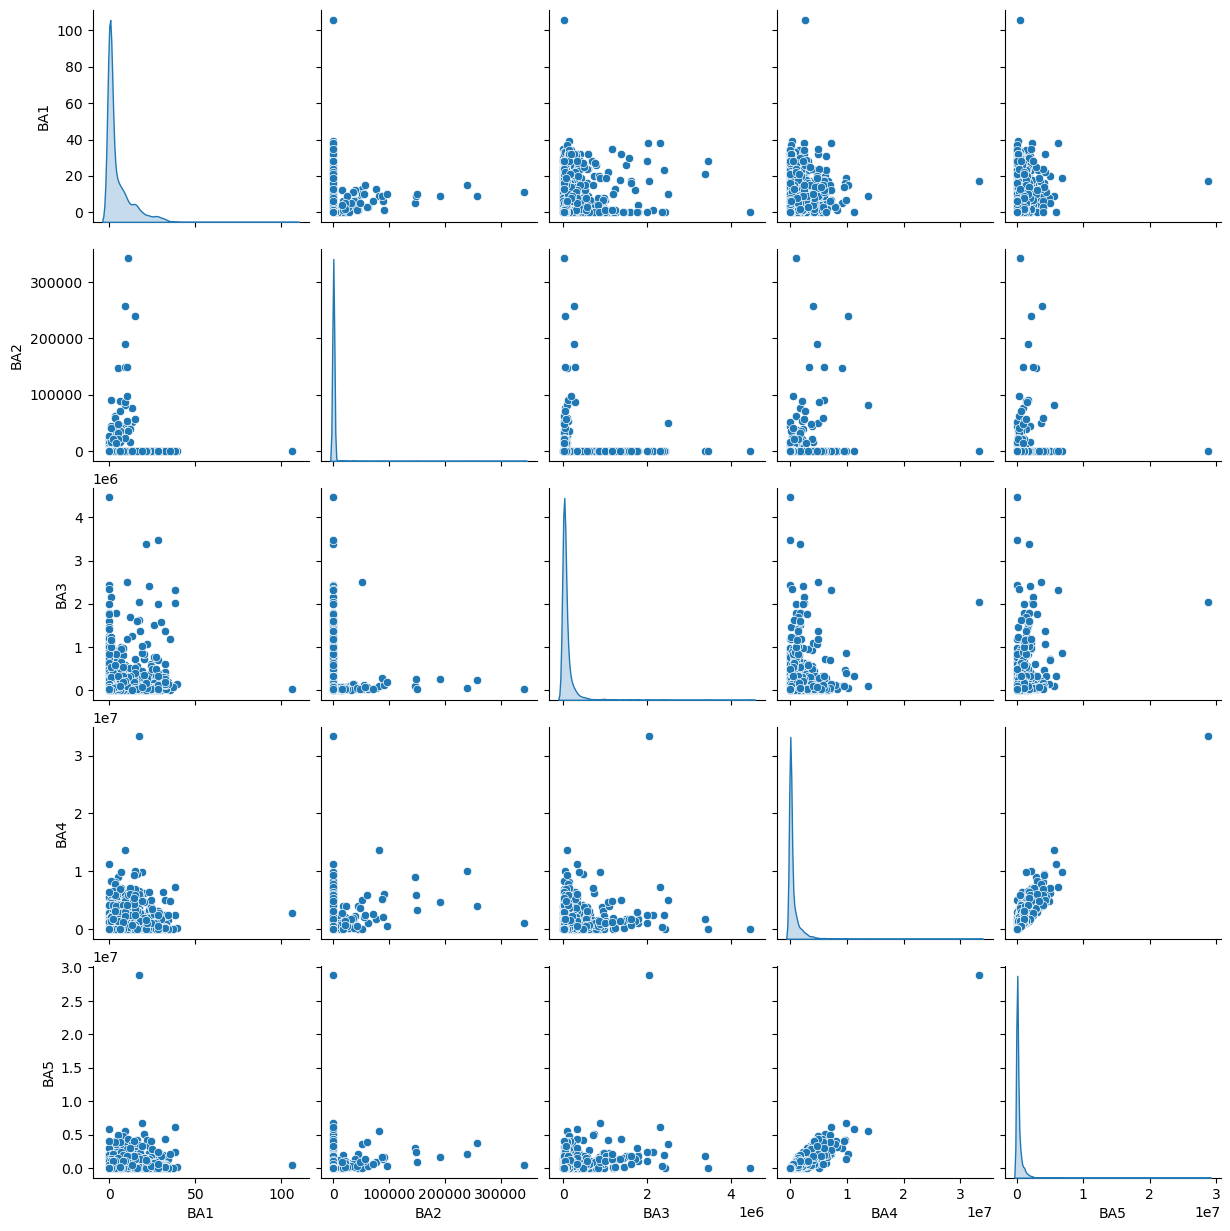

In [10]:
# Pairplot for numerical columns
# This creates a grid of scatterplots for all pairs of numerical columns
sns.pairplot(df[['BA1', 'BA2', 'BA3', 'BA4', 'BA5']], diag_kind='kde')
plt.show()

In [11]:
df["InvType"].value_counts()

C1    2416
C0    2318
Name: InvType, dtype: int64

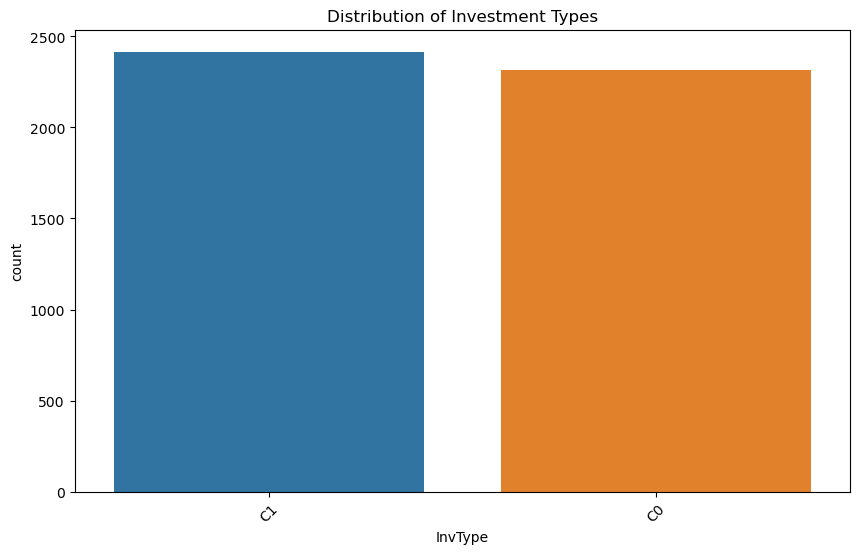

In [12]:
# Let's assume you want to analyze the distribution of the 'InvType' column
# Countplot for categorical data (e.g., distribution of 'InvType')
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='InvType')
plt.title('Distribution of Investment Types')
plt.xticks(rotation=45)
plt.show()

>Encoding SE2 and target column using **label Encoder**

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder
le=LabelEncoder()
#x['SE2']=le.fit_transform(x['SE2'])
y=le.fit_transform(y)
ct=ColumnTransformer(transformers=[("Encoder",OrdinalEncoder(),["SE2"])],remainder="passthrough")
x=ct.fit_transform(x)

In [14]:
x

array([[21., 45., 12., ...,  0.,  0.,  1.],
       [ 0., 41.,  0., ...,  0.,  0.,  1.],
       [ 0., 43.,  1., ...,  0.,  0.,  0.],
       ...,
       [42., 44., 19., ...,  0.,  0.,  1.],
       [ 0., 22.,  0., ...,  0.,  0.,  0.],
       [57., 47.,  0., ...,  0.,  0.,  0.]])

In [15]:
y

array([1, 1, 1, ..., 1, 1, 0])

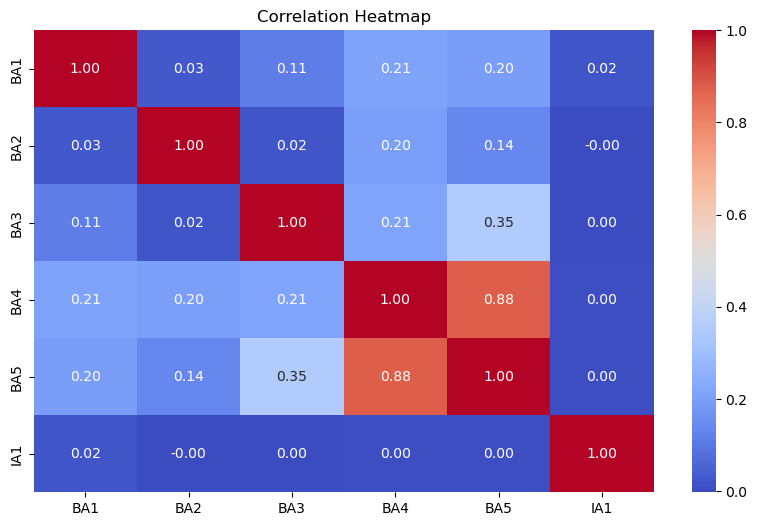

In [16]:
correlation_matrix = df[['BA1', 'BA2', 'BA3', 'BA4', 'BA5', 'IA1']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

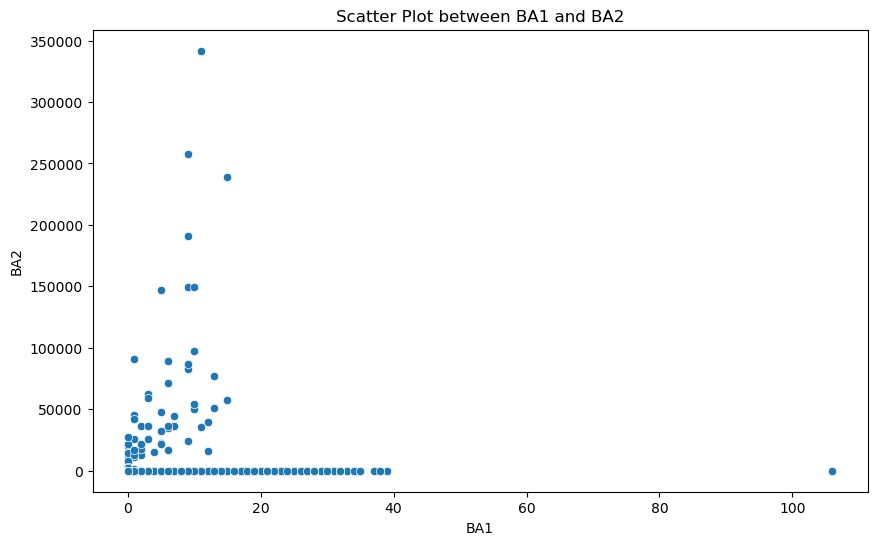

In [17]:
# Scatter plot between 'BA1' and 'BA2' columns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='BA1', y='BA2')
plt.title('Scatter Plot between BA1 and BA2')
plt.show()

In [18]:
df['SE1'].value_counts()

47    152
33    145
36    130
39    125
41    125
     ... 
88      1
86      1
91      1
96      1
90      1
Name: SE1, Length: 90, dtype: int64

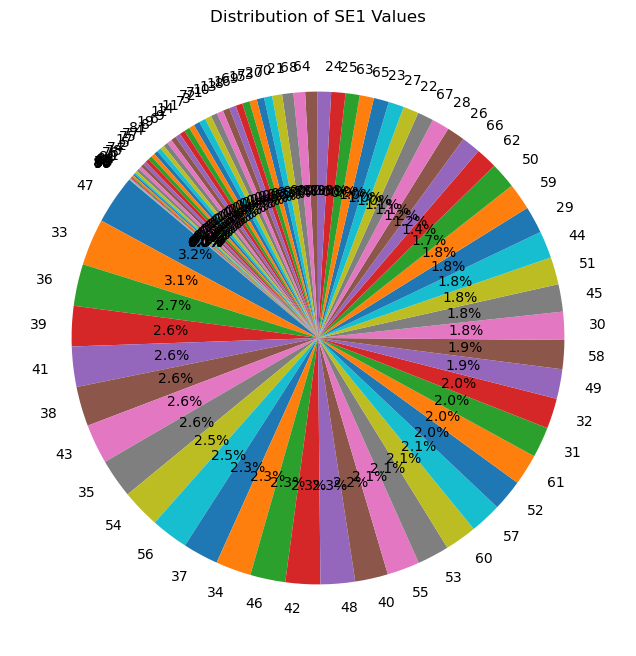

In [19]:
# Pie chart to show the distribution of 'SE1' values
se1_counts = df['SE1'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(se1_counts, labels=se1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of SE1 Values')
plt.show()

### 3. Data Splitting

>Split the data into training and testing sets.70% of the data will be used for training, and the rest for testing.

In [20]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

### 4.Model Selection

>We will be using  Random Forest, Logistic Regression, Decision Trees, Support Vector Machines,KNeighbors,navie bayes or Gradient Boosting Machine Learning classification algorithm for prediction task

### 5.Model Training and Evaluation

>Train the selected model on the training data

>Evaluate the model's performance using appropriate metrics such as accuracy, precision, recall, F1-score, and confusion matrix

In [21]:
#Creating objects of all class
lreg=LogisticRegression()
knn=KNeighborsClassifier()
svm=SVC()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
nb=GaussianNB()

In [22]:
def mymodel(model):
    model.fit(xtrain,ytrain)
    ypred=model.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    cm=confusion_matrix(ytest,ypred)
    cr=classification_report(ytest,ypred)
    print(f"Accuracy: {ac} \n\n Confusion Matrix: \n{cm} \n\n Classification Report: \n{cr}")

In [23]:
mymodel(lreg)

Accuracy: 0.5756509500351865 

 Confusion Matrix: 
[[595 110]
 [493 223]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.55      0.84      0.66       705
           1       0.67      0.31      0.43       716

    accuracy                           0.58      1421
   macro avg       0.61      0.58      0.54      1421
weighted avg       0.61      0.58      0.54      1421



In [24]:
mymodel(knn)

Accuracy: 0.757213230119634 

 Confusion Matrix: 
[[514 191]
 [154 562]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       705
           1       0.75      0.78      0.77       716

    accuracy                           0.76      1421
   macro avg       0.76      0.76      0.76      1421
weighted avg       0.76      0.76      0.76      1421



In [25]:
mymodel(svm)

Accuracy: 0.6537649542575651 

 Confusion Matrix: 
[[282 423]
 [ 69 647]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.80      0.40      0.53       705
           1       0.60      0.90      0.72       716

    accuracy                           0.65      1421
   macro avg       0.70      0.65      0.63      1421
weighted avg       0.70      0.65      0.63      1421



In [26]:
mymodel(dt)

Accuracy: 0.7227304714989444 

 Confusion Matrix: 
[[490 215]
 [179 537]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.73      0.70      0.71       705
           1       0.71      0.75      0.73       716

    accuracy                           0.72      1421
   macro avg       0.72      0.72      0.72      1421
weighted avg       0.72      0.72      0.72      1421



In [27]:
mymodel(rf)

Accuracy: 0.7776213933849402 

 Confusion Matrix: 
[[537 168]
 [148 568]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       705
           1       0.77      0.79      0.78       716

    accuracy                           0.78      1421
   macro avg       0.78      0.78      0.78      1421
weighted avg       0.78      0.78      0.78      1421



In [28]:
mymodel(nb)

Accuracy: 0.546094299788881 

 Confusion Matrix: 
[[108 597]
 [ 48 668]] 

 Classification Report: 
              precision    recall  f1-score   support

           0       0.69      0.15      0.25       705
           1       0.53      0.93      0.67       716

    accuracy                           0.55      1421
   macro avg       0.61      0.54      0.46      1421
weighted avg       0.61      0.55      0.46      1421



>>So we've build a model to solve our machine learning problem by getting maximum accuracy as 70% from random forest but we're not too impresses by the results.

>>when we have exhaused all data sources,it's time to move on to model hyperparameter tuning.This will focus on optimizing the model in pyhton using scikit-Learn tools.As it will help us to cover many widely-applicable machine learning concepts.


### 6.Hyperparameter Tunning

>Performing hyperparameter tuning to find the best model parameters using techniques like Grid Search or Random Search. This step can enhance the model's performance

>We have created a machine learning pipeline with three stages: data preprocessing (standardization),classifiers (SVM, Logistic Regression,Random Forest, Decision Tree, and KNN) and hyperparameter tuning.

In [29]:
from sklearn.pipeline import Pipeline

>We defined a dictionary of classifiers, each associated with its respective hyperparameter grid for hyperparameter tuning.

>We loop through each classifier, creating a pipeline that includes standardization (scaling) of features and hyperparameter tuning using GridSearchCV, and then fit the pipeline on the training data.

>We calculate and store the accuracy of each classifier on the test set.

>Finally, we display the results in a list name(results) to compare the accuracy of different classifiers with their respective hyperparameters.

In [30]:
classifiers = {
    'SVM': {
        'classifier': SVC(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__kernel': ['linear', 'rbf']
        }
    },
    'LogisticRegression': {
        'classifier': LogisticRegression(),
        'params': {
            'classifier__C': [0.1, 1, 10],
            'classifier__solver': ['sag','saga']
        }
    },
    'Random Forest': {
        'classifier': RandomForestClassifier(),
        'params': {
            'classifier__n_estimators': [50, 100, 200],
            'classifier__max_depth': [None, 10, 20]
        }
    },
    'DecisionTree': {
        'classifier': DecisionTreeClassifier(),
        'params': {
            'classifier__max_depth': [None, 10, 20, 30]
        }
    },
    'KNN': {
        'classifier': KNeighborsClassifier(),
        'params': {
            'classifier__n_neighbors': [3, 5, 7]
        }
    }
}

In [31]:
#Create a list to store results
results = []

# Loop through each classifier and perform hyperparameter tuning
for classifier_name, classifier_config in classifiers.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),  # Standardize features
        ('classifier', classifier_config['classifier'])
    ])
    
    param_grid = classifier_config['params']
    
    grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)
    grid_search.fit(xtrain, ytrain)
    
    # Evaluate the model on the test set
    test_score = grid_search.score(xtest,ytest)
    
    results.append({
        'Classifier': classifier_name,
        'Best_Parameters': grid_search.best_params_,
        'Test_Score': test_score
    })

# Display the results
for result in results:
    print(f"Classifier: {result['Classifier']}")
    print(f"Best Parameters: {result['Best_Parameters']}")
    print(f"Test Score: {result['Test_Score']}\n")


Classifier: SVM
Best Parameters: {'classifier__C': 10, 'classifier__kernel': 'rbf'}
Test Score: 0.6966924700914848

Classifier: LogisticRegression
Best Parameters: {'classifier__C': 10, 'classifier__solver': 'saga'}
Test Score: 0.6868402533427164

Classifier: Random Forest
Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Test Score: 0.7797325826882477

Classifier: DecisionTree
Best Parameters: {'classifier__max_depth': 10}
Test Score: 0.757213230119634

Classifier: KNN
Best Parameters: {'classifier__n_neighbors': 7}
Test Score: 0.6699507389162561



In [32]:
rf.score(xtest,ytest)

0.7776213933849402

In [33]:
rf.score(xtrain,ytrain)

0.9996981587684878

In [34]:
for i in range(10,100):
    rf1=RandomForestClassifier(max_depth=i)
    rf1.fit(xtrain,ytrain)
    ypred=rf1.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"Max depth={i}  accuracy={ac}")

Max depth=10  accuracy=0.7748064743138635
Max depth=11  accuracy=0.7790288529204785
Max depth=12  accuracy=0.7853624208304011
Max depth=13  accuracy=0.784658691062632
Max depth=14  accuracy=0.7818437719915552
Max depth=15  accuracy=0.7832512315270936
Max depth=16  accuracy=0.7881773399014779
Max depth=17  accuracy=0.776917663617171
Max depth=18  accuracy=0.7776213933849402
Max depth=19  accuracy=0.7776213933849402
Max depth=20  accuracy=0.772695285010556
Max depth=21  accuracy=0.7790288529204785
Max depth=22  accuracy=0.7811400422237861
Max depth=23  accuracy=0.7755102040816326
Max depth=24  accuracy=0.7748064743138635
Max depth=25  accuracy=0.7741027445460943
Max depth=26  accuracy=0.7663617171006334
Max depth=27  accuracy=0.7762139338494018
Max depth=28  accuracy=0.7797325826882477
Max depth=29  accuracy=0.7811400422237861
Max depth=30  accuracy=0.7839549612948628
Max depth=31  accuracy=0.7755102040816326
Max depth=32  accuracy=0.7762139338494018
Max depth=33  accuracy=0.780436312456

In [35]:
rf2=rf1=RandomForestClassifier(max_depth=51)
rf2.fit(xtrain,ytrain)
ypred=rf2.predict(xtest)
rf2.score(xtrain,ytrain)
rf2.score(xtest,ytest)

0.7733990147783252

In [36]:
rf2.score(xtrain,ytrain)

0.9996981587684878

In [37]:
for i in range(1,31):
    rf3=RandomForestClassifier(min_samples_split=i)
    rf3.fit(xtrain,ytrain)
    ypred=rf3.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_split={i}  accuracy={ac}")

min_samples_split=1  accuracy=0.7762139338494018
min_samples_split=2  accuracy=0.776917663617171
min_samples_split=3  accuracy=0.7755102040816326
min_samples_split=4  accuracy=0.7825475017593244
min_samples_split=5  accuracy=0.7839549612948628
min_samples_split=6  accuracy=0.7712878254750176
min_samples_split=7  accuracy=0.7839549612948628
min_samples_split=8  accuracy=0.7811400422237861
min_samples_split=9  accuracy=0.7811400422237861
min_samples_split=10  accuracy=0.7776213933849402
min_samples_split=11  accuracy=0.7797325826882477
min_samples_split=12  accuracy=0.7783251231527094
min_samples_split=13  accuracy=0.7839549612948628
min_samples_split=14  accuracy=0.7755102040816326
min_samples_split=15  accuracy=0.7776213933849402
min_samples_split=16  accuracy=0.7818437719915552
min_samples_split=17  accuracy=0.7776213933849402
min_samples_split=18  accuracy=0.7797325826882477
min_samples_split=19  accuracy=0.7825475017593244
min_samples_split=20  accuracy=0.7748064743138635
min_sample

In [38]:
rf4=rf1=RandomForestClassifier(min_samples_split=14)
rf4.fit(xtrain,ytrain)
ypred=rf4.predict(xtest)

rf4.score(xtest,ytest)

0.776917663617171

In [39]:
rf4.score(xtrain,ytrain)

0.9118623603984304

In [40]:
for i in range(1,51):
    rf5=RandomForestClassifier(min_samples_leaf=i)
    rf5.fit(xtrain,ytrain)
    ypred=rf5.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    print(f"min_samples_leaf={i}  accuracy={ac}")

min_samples_leaf=1  accuracy=0.7804363124560169
min_samples_leaf=2  accuracy=0.7825475017593244
min_samples_leaf=3  accuracy=0.7783251231527094
min_samples_leaf=4  accuracy=0.7748064743138635
min_samples_leaf=5  accuracy=0.7776213933849402
min_samples_leaf=6  accuracy=0.7776213933849402
min_samples_leaf=7  accuracy=0.7783251231527094
min_samples_leaf=8  accuracy=0.7762139338494018
min_samples_leaf=9  accuracy=0.7783251231527094
min_samples_leaf=10  accuracy=0.7748064743138635
min_samples_leaf=11  accuracy=0.7762139338494018
min_samples_leaf=12  accuracy=0.7776213933849402
min_samples_leaf=13  accuracy=0.7719915552427867
min_samples_leaf=14  accuracy=0.776917663617171
min_samples_leaf=15  accuracy=0.7705840957072484
min_samples_leaf=16  accuracy=0.7684729064039408
min_samples_leaf=17  accuracy=0.7698803659394793
min_samples_leaf=18  accuracy=0.7719915552427867
min_samples_leaf=19  accuracy=0.7776213933849402
min_samples_leaf=20  accuracy=0.7719915552427867
min_samples_leaf=21  accuracy=

In [41]:
rf6=rf1=RandomForestClassifier(min_samples_leaf=9)
rf6.fit(xtrain,ytrain)
ypred=rf6.predict(xtest)
rf6.score(xtest,ytest)

0.7776213933849402

In [42]:
rf6.score(xtrain,ytrain)

0.833383640205252

In [43]:
rf7= RandomForestClassifier(
    n_estimators=100,
    max_depth=51,            
    min_samples_split=14,
    min_samples_leaf=9,      
    max_features='sqrt')

In [44]:
rf7.fit(xtrain,ytrain)
ypred=rf7.predict(xtest)
rf7.score(xtest,ytest)

0.7790288529204785

In [45]:
rf7.score(xtrain,ytrain)

0.8288560217325687

In [46]:
 from sklearn.ensemble import AdaBoostClassifier

In [47]:
ada=AdaBoostClassifier()
ada.fit(xtrain,ytrain)
ypred=ada.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75       705
           1       0.76      0.75      0.75       716

    accuracy                           0.75      1421
   macro avg       0.75      0.75      0.75      1421
weighted avg       0.75      0.75      0.75      1421



In [48]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(xtrain,ytrain)
ypred=gd.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       705
           1       0.80      0.78      0.79       716

    accuracy                           0.79      1421
   macro avg       0.79      0.79      0.79      1421
weighted avg       0.79      0.79      0.79      1421



In [49]:
!pip install xgboost

In [50]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(xtrain,ytrain)
ypred=xgb.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78       705
           1       0.77      0.81      0.79       716

    accuracy                           0.78      1421
   macro avg       0.79      0.78      0.78      1421
weighted avg       0.79      0.78      0.78      1421



In [51]:
p2=Pipeline(steps=[("scaler",StandardScaler()),("gd",GradientBoostingClassifier())])
#p2.fit(xtrain,ytrain)
#ypred=p1.predict(xtest)

In [52]:
import pickle

In [53]:
pickle.dump(ct,open("columntransform.pkl","wb"))
pickle.dump(p2,open("pipe2.pkl","wb"))
#pickle.dump(StandardScaler(),open("stdscaler.pkl","wb"))
#pickle.dump(gd,open("gradientboosting.pkl","wb"))